# Weather

**Knock airport Weather**

![knock Airport](https://img.rasset.ie/0013f339-800.jpg)

Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


**Tasks**

Plot:

1. The temperature
1. The mean temperature each day
1. The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

1. The Windspeed (there is data missing from this column)
1. The rolling windspeed (say over 24 hours)
1. The max windspeed for each day
1. The monthly mean of the daily max windspeeds 



In [3]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import seaborn as sns


In [4]:
#Import the dataset

df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, skipinitialspace=True) 
#skiprows=24 is used to skip the first 24 rows of the dataset as they are just used for metadata
#low_memory=False is used to ensure that the data is read in as a single data type

#We need to rename the columns of the dataset as they are not properly named - use the metadata to do this
df.columns = ['Date/Time (utc)', 'Indicator', 'Precipitation Amount (mm)', 'Indicator', 'Temperature (°C)', 'Indicator', 'Wet Bulb Temperature (°C)', 'Dew Point Temp (°C)', 'Vapour Pressure (hPa)','Relative Humidity (%)', 'Mean Sea Level Pressure (hPa)','Indicator', 'Mean Wind Speed (knot)', 'Indicator', 'Predominant Wind Direction (deg)', 'Present Weather', 'Past Weather', 'Sunshine duration (hours)', 'Visibility', 'Cloud Height (ft * 100s)', 'Cloud amount']
df.head()


,Date/Time (utc),Indicator,Precipitation Amount (mm),Indicator,Temperature (°C),Indicator,Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator,Mean Wind Speed (knot),Indicator,Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0.0,0,0.0,25.0,81.0,0.0,35000.0,32.0,5.0
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,40000.0,45.0,5.0
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0.0,0,0.0,80.0,81.0,0.0,8000.0,32.0,7.0
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,28000.0,35.0,6.0
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0.0,0,0.0,2.0,11.0,0.0,40000.0,40.0,6.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date/Time (utc)                   247674 non-null  object 
 1   Indicator                         247674 non-null  int64  
 2   Precipitation Amount (mm)         247625 non-null  float64
 3   Indicator                         247674 non-null  int64  
 4   Temperature (°C)                  247674 non-null  float64
 5   Indicator                         247674 non-null  int64  
 6   Wet Bulb Temperature (°C)         247674 non-null  float64
 7   Dew Point Temp (°C)               247674 non-null  float64
 8   Vapour Pressure (hPa)             247674 non-null  float64
 9   Relative Humidity (%)             247674 non-null  int64  
 10  Mean Sea Level Pressure (hPa)     247656 non-null  float64
 11  Indicator                         247674 non-null  i

In [6]:
#Check for missing values. We can see that there is a lot of missing data in the dataset
df.isna().sum()

Date/Time (utc)                         0
Indicator                               0
Precipitation Amount (mm)              49
Indicator                               0
Temperature (°C)                        0
Indicator                               0
Wet Bulb Temperature (°C)               0
Dew Point Temp (°C)                     0
Vapour Pressure (hPa)                   0
Relative Humidity (%)                   0
Mean Sea Level Pressure (hPa)          18
Indicator                               0
Mean Wind Speed (knot)                 50
Indicator                               0
Predominant Wind Direction (deg)       52
Present Weather                     55079
Past Weather                        55080
Sunshine duration (hours)               0
Visibility                          62174
Cloud Height (ft * 100s)               18
Cloud amount                           18
dtype: int64

In [7]:
#Convert the Date/Time column to a datetime object.
#This will convert the date time from the current format to a datetime object which will allow us to perform time series analysis on the data
#The format parameter is used to specify the format of the date time in the dataset

df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y %H:%M')
print(df['Date/Time (utc)'])

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: Date/Time (utc), Length: 247674, dtype: datetime64[ns]


### Plot the Temperature

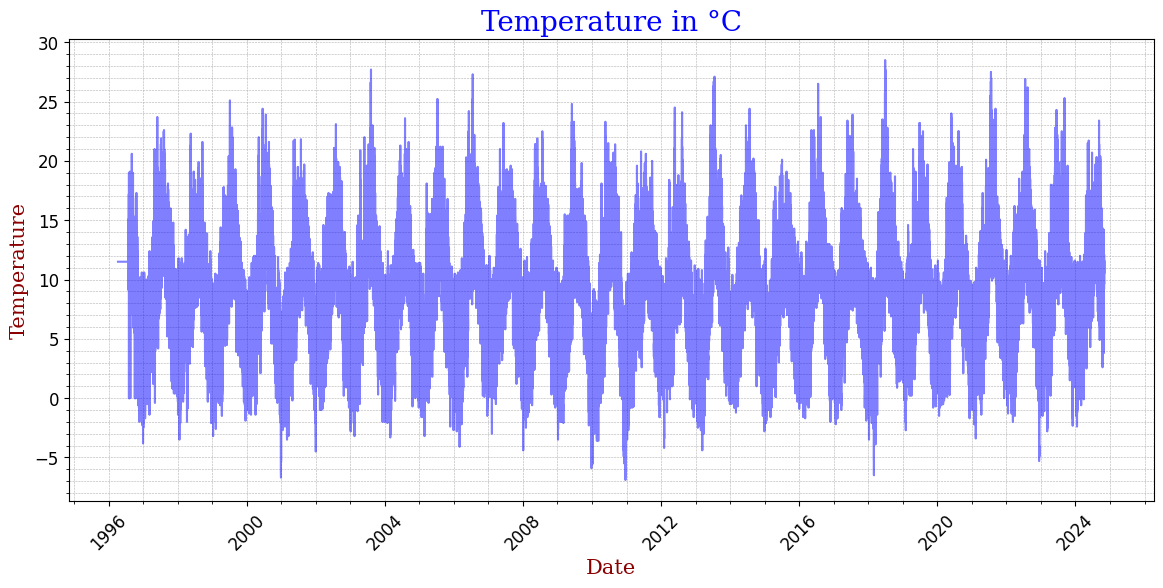

In [8]:
# Extract only the date (without time) for plotting
df['Date_only'] = df['Date/Time (utc)'].dt.date

#Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


ax.plot(df['Date_only'], df['Temperature (°C)'], color='blue', alpha=0.5)
ax.set_title('Temperature in °C', fontdict = font1)
ax.set_xlabel('Date' , fontdict = font2)
ax.set_ylabel('Temperature', fontdict = font2);
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax.minorticks_on()

Obviously, with such a large amount of date being plotted, a good visualisation is not achieved. We can truncate the data based on time to achieve much clearer and cleaner plots. 
Lets have a look at this below.

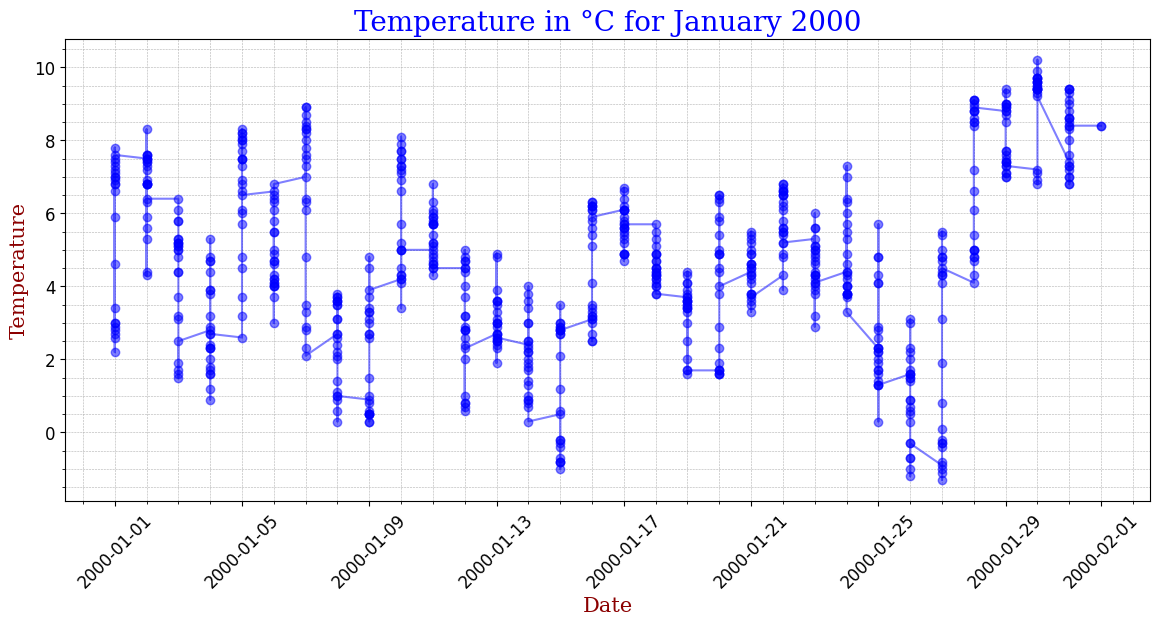

In [9]:
#Set the Date/Time column as the index of the dataframe. This will allow us to perform time series analysis on the data
df.set_index('Date/Time (utc)', inplace=True)

dateFrom = "2000-01-01 01:00:00"
dateTo = "2000-02-01 01:00:00"

truncatedDF = df.loc[dateFrom:dateTo]

#Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


ax.plot(truncatedDF['Date_only'], truncatedDF['Temperature (°C)'], color='blue', alpha=0.5, marker="o")
ax.set_title('Temperature in °C for January 2000', fontdict = font1)
ax.set_xlabel('Date' , fontdict = font2)
ax.set_ylabel('Temperature', fontdict = font2);
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax.minorticks_on()



Better, but still not great. Maybe a seaborn lineplot will give us better results.

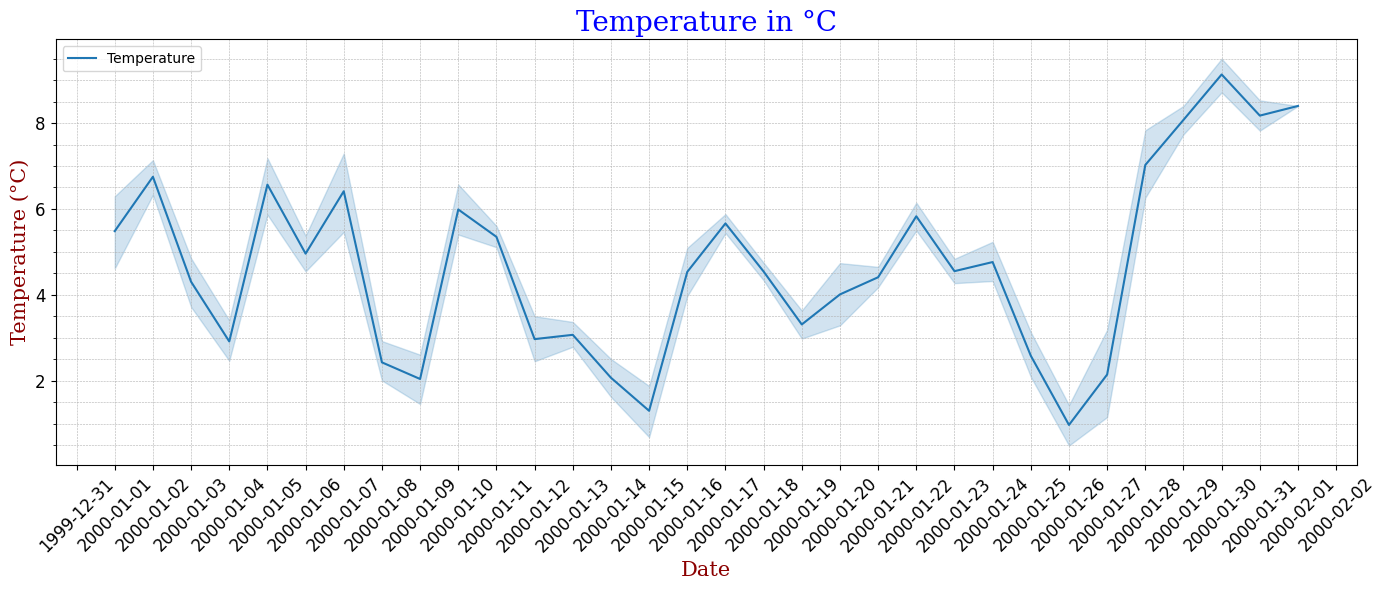

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


sns.lineplot(data=truncatedDF, x='Date_only', y='Temperature (°C)')
plt.title('Temperature in °C', fontdict=font1)
plt.xlabel('Date', fontdict=font2)
plt.ylabel('Temperature (°C)', fontdict=font2)
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdate.DayLocator(interval=1))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdate.DayLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.legend(['Temperature'], loc='upper left')
# Adjust layout to fit labels
plt.tight_layout()
plt.show()

### The mean temperature each day

In [11]:
#Calculate the mean temperature for each day.
#We can use the resample method to calculate the mean temperature for each day
#The 'D' parameter is used to specify that we want to resample the data by day
meantemp_daily = df['Temperature (°C)'].resample('D').mean()

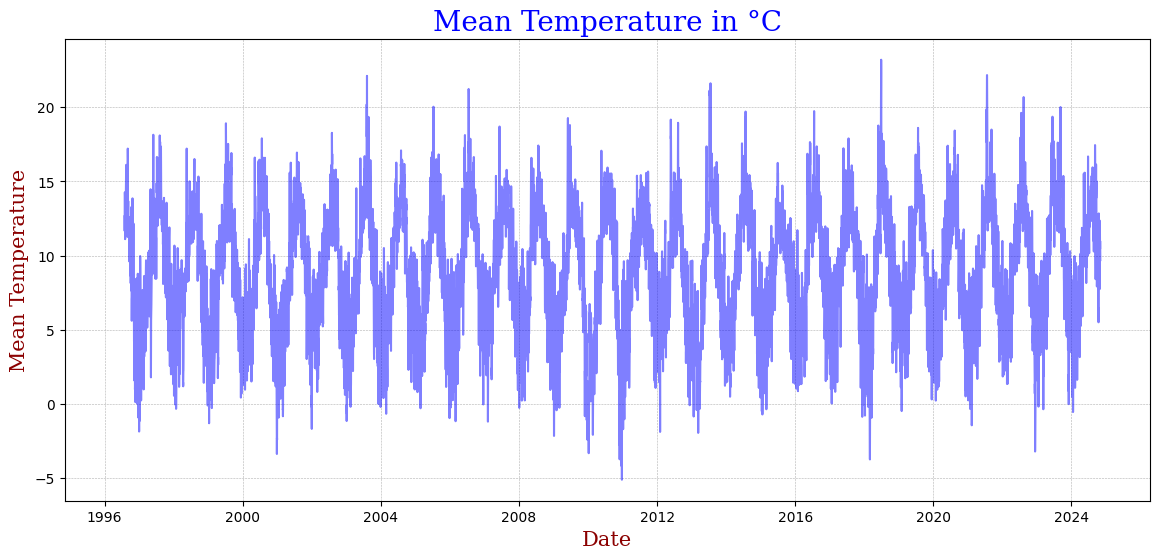

In [12]:
#Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

ax.plot(meantemp_daily.index, meantemp_daily, color='blue', alpha=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
ax.set_title('Mean Temperature in °C', fontdict = font1)
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2);



Again, with a large amount of data in the dataset, this is not giving us the best visual plot. Lets look at truncating the data, as above for this plot also.

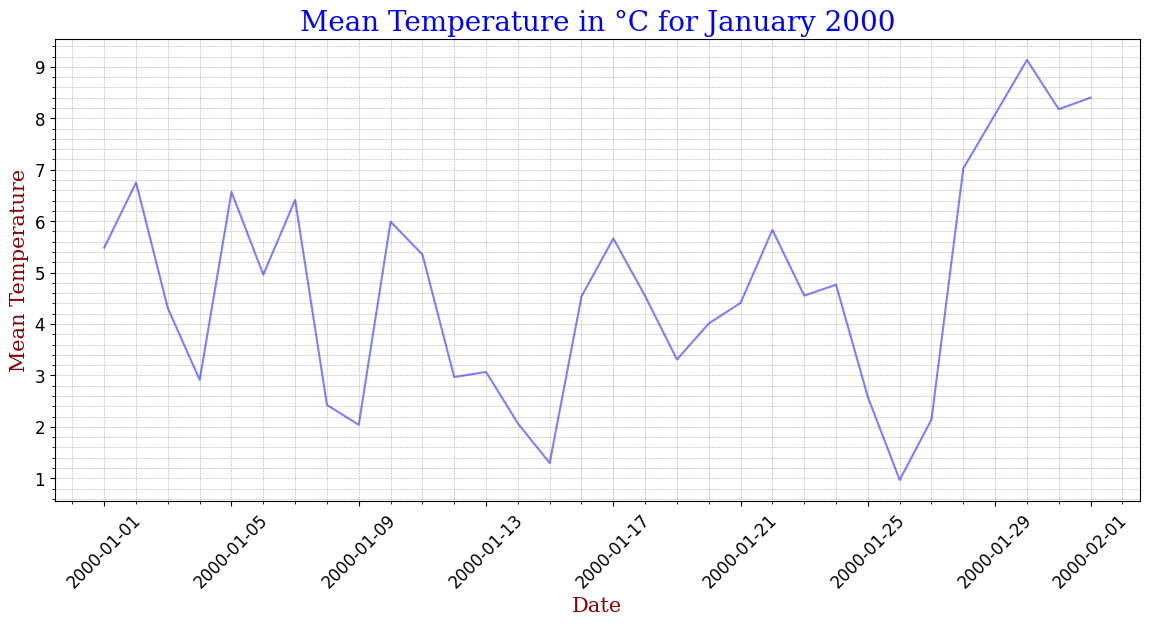

In [13]:
truncated_meantemp = truncatedDF['Temperature (°C)'].resample('D').mean()

##Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

ax.plot(truncated_meantemp,  color='blue', alpha=0.5)
ax.set_title('Mean Temperature in °C for January 2000', fontdict = font1)
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2);
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax.minorticks_on()

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

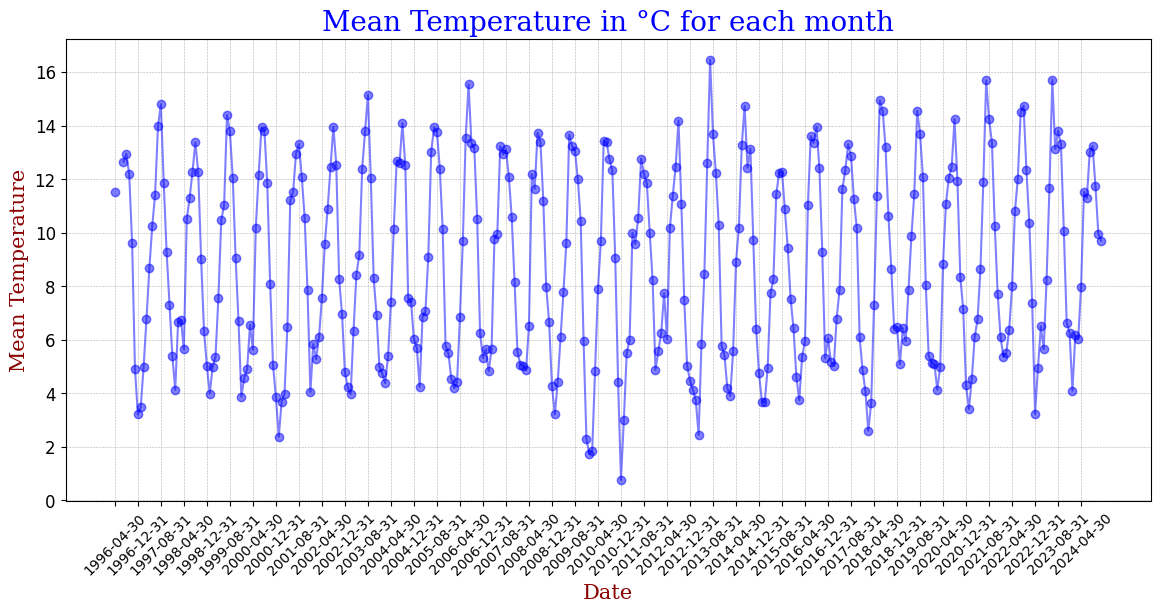

In [14]:
#Calculate the mean temperature for each month.
#We can use the resample method to calculate the mean temperature for each month
#The 'M' parameter is used to specify that we want to resample the data by month
meantemp_mounthly = df['Temperature (°C)'].resample('ME').mean()

#Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean temperature data
ax.plot(meantemp_mounthly.index.astype(str), meantemp_mounthly, color='blue', marker='o', alpha=0.5)
ax.set_title('Mean Temperature in °C for each month', fontdict = font1)
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2)
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
#Set the x-axis to show only every 6th month
ax.set_xticks(ax.get_xticks()[::8])
plt.xticks(rotation=45)
plt.yticks(fontsize=12)




### Plot the Windspeed

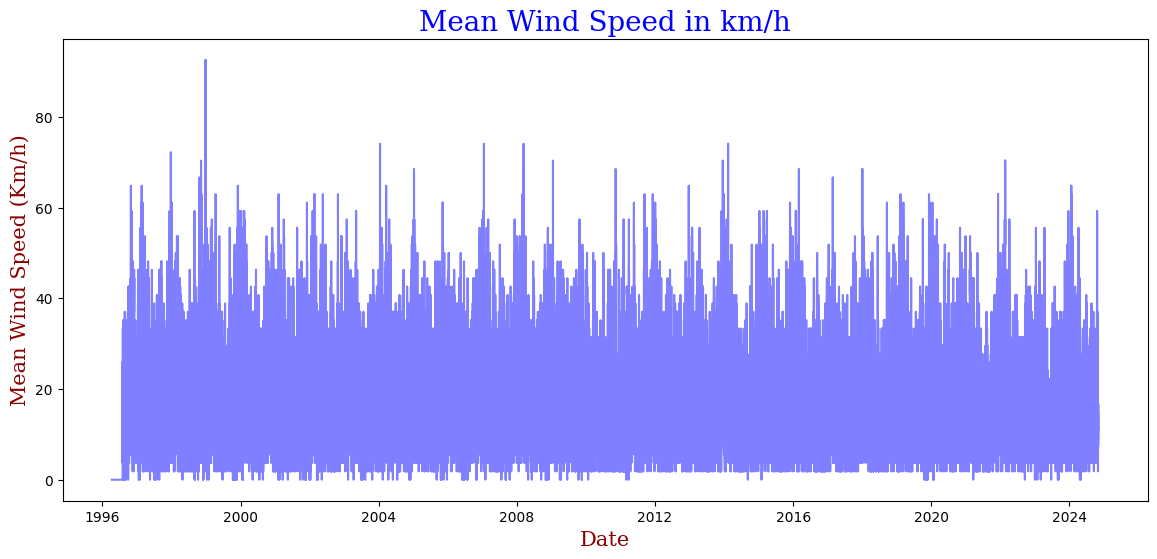

In [15]:
#The windspeed data is in knots. We can convert this to km/h by multiplying by 1.852
#Firstly though, we need to deal with the missing values in the dataset
#We can use the interpolate method to fill in the missing values
#The interpolate method uses linear interpolation to fill in the missing values
#We can then convert the windspeed data to km/h by multiplying by 1.852

df['Mean Wind Speed (knot)'] = df['Mean Wind Speed (knot)'].interpolate()

#Convert the windspeed data to km/h
df['Mean Wind Speed (km/h)'] = df['Mean Wind Speed (knot)'] * 1.852

#Plot the windspeed data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

ax.plot(df['Date_only'], df['Mean Wind Speed (km/h)'], color='blue', alpha=0.5)
ax.set_title('Mean Wind Speed in km/h', fontdict = font1)
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Wind Speed (Km/h)', fontdict = font2);


### A similar issue can be seen above. In order to get a satisfactory plot it is necessary to truncate the data based on time. We will have a look at this below.

In [16]:
#Truncate the windspeed data....
truncated_windspeed = truncatedDF['Mean Wind Speed (knot)'].interpolate

df['Mean Wind Speed (km/h)'] = truncated_windspeed * 1.852

print(df['Mean Wind Speed (km/h)'])

#Plot the windspeed data
fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data=truncatedDF, x='Date_only', y='Mean Wind Speed (km/h)')
plt.title('Windspeed for the month of June 2010', fontdict=font1)
plt.xlabel('Date', fontdict=font2)
plt.ylabel('Windspeed (km/h)', fontdict=font2)
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(['Windspeed'], loc='upper right', fontsize=12)

# Customize x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdate.DayLocator(interval=4))  # Set major ticks to every day
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  # Format the ticks to show date only
ax.xaxis.set_minor_locator(mdate.DayLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()
plt.show()



TypeError: unsupported operand type(s) for *: 'method' and 'float'

Text(0, 0.5, 'Rolling Wind Speed (Km/h)')

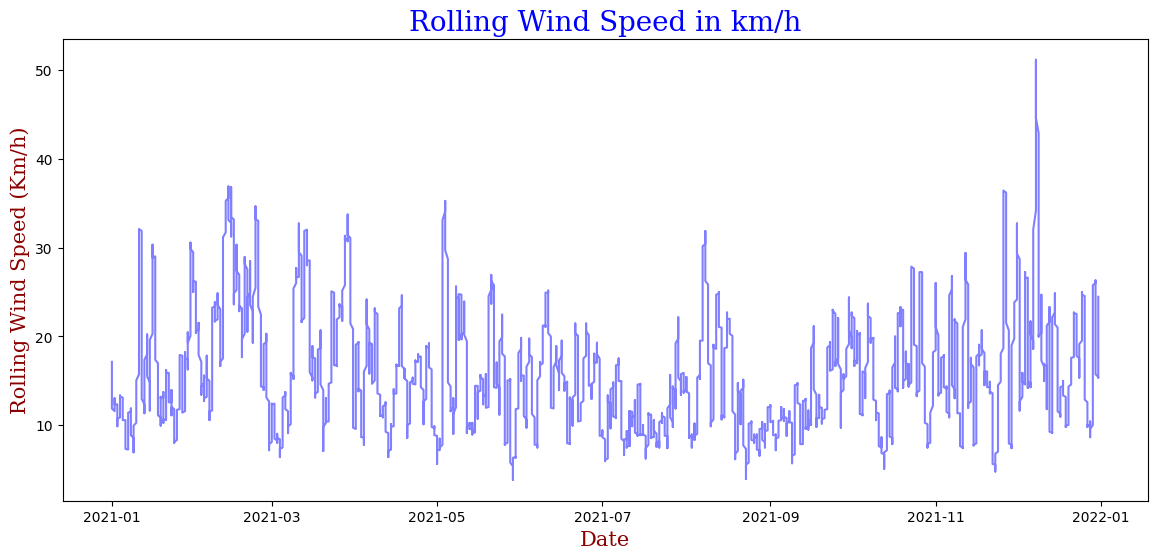

In [ ]:
#The rolling windspeed over a 24 hour period for the year 2021
#We can calculate the rolling windspeed over a 24 hour period using the rolling method
#The rolling method calculates the rolling average over a specified window size
#We can specify the window size by using the window parameter

#Date filter to get data for the year 2021
date_from = '2021-01-01'
date_to = '2021-12-31'

#Calculate the rolling windspeed over a 24 hour period
df['Rolling Wind Speed (km/h)'] = df['Mean Wind Speed (km/h)'].rolling(window=24).mean()

#Plot the rolling windspeed data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Use date filter to filter the data for the year 2021
ax.plot(df.loc[date_from:date_to]['Date_only'], df.loc[date_from:date_to]['Rolling Wind Speed (km/h)'], color='blue', alpha=0.5)
ax.set_title('Rolling Wind Speed in km/h', fontdict = font1)
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Rolling Wind Speed (Km/h)', fontdict = font2)
#Set the x-axis to show only every 30th day



## References

https://www.javatpoint.com/how-to-skip-rows-while-reading-csv-file-using-pandas

### End